In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/content/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.price.describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

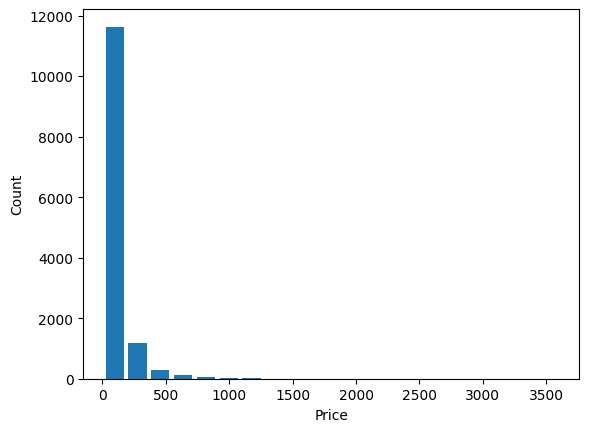

In [6]:
# Created the histplot
plt.hist(df.price,bins=20,rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [8]:
lower_limit,Upper_limit=df.price.quantile([0.001,0.999])
lower_limit,Upper_limit

(11.159500000000001, 2000.0)

In [9]:
outliers = df[(df.price>Upper_limit) | (df.price<lower_limit)]
outliers.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13067,Plot Area,Ready To Move,Defence Colony,10 Bedroom,NaN,7150,13.0,NaN,3600.00
8594,Built-up Area,Ready To Move,Chandapura,1 BHK,NaN,450,1.0,1.0,9.00
12579,Super built-up Area,Ready To Move,Chandapura,1 BHK,NaN,410,1.0,1.0,10.00
2437,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,395,1.0,1.0,10.25
10304,Plot Area,Ready To Move,5th Block Jayanagar,4 Bedroom,NaN,10624,4.0,2.0,2340.00
171,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,450,1.0,1.0,11.00
1471,Built-up Area,18-Mar,Kengeri,1 BHK,NaN,340,1.0,1.0,10.00
2623,Plot Area,18-Jul,Dodsworth Layout,4 Bedroom,NaN,30000,4.0,NaN,2100.00
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.00
7482,Super built-up Area,Ready To Move,Alur,1 BHK,NaN,470,2.0,1.0,10.00


In [12]:
#df2 is not outliers
df2 = df[(df.price<Upper_limit) & (df.price>lower_limit)]
df2.shape

(13291, 9)

In [13]:
df.shape

(13320, 9)

In [14]:
df.shape[0] - df2.shape[0]

29

In [15]:
#we use df2 to find the qutliers using the 4std
max_limit = df2.price.mean() + 4*df2.price.std()
min_limit = df2.price.mean() - 4*df2.price.std()
max_limit, min_limit

(611.7477497493892, -391.7270282084969)

In [16]:
df2[(df2.price>max_limit) | (df2.price<min_limit)].sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8170,Super built-up Area,Ready To Move,Srinivas Colony,3 BHK,NaN,2750,3.0,2.0,943.0
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0
1873,Plot Area,Ready To Move,Kasavanhalli,5 Bedroom,NaN,5800,7.0,NaN,1200.0
7022,Super built-up Area,Ready To Move,Sadashiva Nagar,3 BHK,NaN,3761,3.0,2.0,650.0
9343,Plot Area,Ready To Move,Mahalakshmi Layout,9 Bedroom,NaN,4320,7.0,2.0,821.0
9016,Super built-up Area,Ready To Move,Sadashiva Nagar,4 BHK,NaN,3500,4.0,NaN,700.0
8237,Plot Area,Ready To Move,Sarjapur Road,4 Bedroom,Adeatlm,5400,4.0,2.0,750.0
8187,Plot Area,Ready To Move,Sarjapur Road,3 Bedroom,Adeatlm,5400,3.0,2.0,700.0
9439,Super built-up Area,Ready To Move,Sadashiva Nagar,5 BHK,NaN,7500,5.0,2.0,1500.0
12748,Built-up Area,Ready To Move,Rajaji Nagar,5 Bedroom,NaN,2500,4.0,0.0,650.0


In [17]:
df3 = df2[(df2.price>min_limit) & (df2.price<max_limit)]
df3.shape

(13144, 9)

In [18]:
df2.shape[0]-df3.shape[0]

147

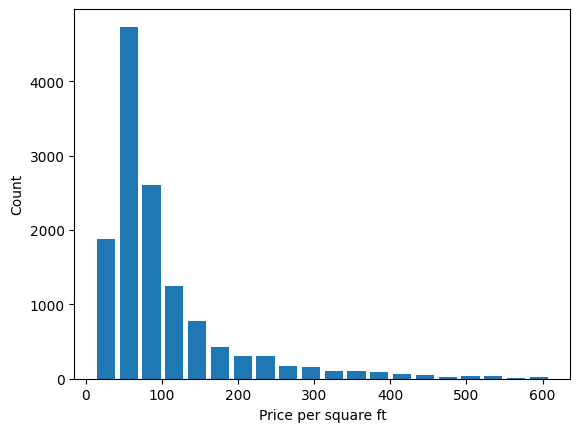

In [19]:
plt.hist(df3.price, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

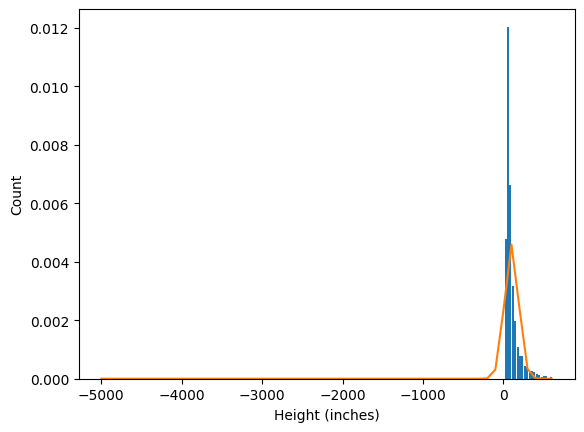

In [20]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price.mean(),df3.price.std()))

In [21]:
df2['zscore'] = (df2.price-df2.price.mean())/df2.price.std()
df2.sample(10)

<ipython-input-21-dfc18d844680>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price-df2.price.mean())/df2.price.std()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
9079,Super built-up Area,Ready To Move,Marathahalli,2 BHK,Asintas,1350,2.0,1.0,99.00,-0.087778
9327,Built-up Area,Ready To Move,Jeevan bima nagar,2 Bedroom,NaN,984,2.0,2.0,125.00,0.119502
670,Built-up Area,Ready To Move,Herohalli,3 Bedroom,NaN,1200,2.0,0.0,70.00,-0.318975
2555,Super built-up Area,Ready To Move,Thigalarapalya,2 BHK,NaN,1418,2.0,2.0,103.00,-0.055889
6574,Super built-up Area,Ready To Move,Brookefield,4 BHK,Gotaten,2400,3.0,3.0,140.00,0.239086
4594,Super built-up Area,17-May,Hegde Nagar,4 BHK,SoisoCa,3216,5.0,2.0,300.00,1.514654
3689,Plot Area,Ready To Move,Hebbal,4 Bedroom,NaN,2700,2.0,2.0,100.00,-0.079806
9086,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1360,2.0,2.0,47.59,-0.497634
1615,Super built-up Area,Ready To Move,Hosa Road,2 BHK,Sancei,1100,2.0,2.0,37.10,-0.581263
8247,Super built-up Area,Ready To Move,Hulimavu,3 BHK,Naepa D,1320,2.0,2.0,59.00,-0.406670


In [22]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(147, 10)

In [23]:
outliers_z.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
6194,Plot Area,Ready To Move,Basavangudi,6 Bedroom,NaN,1754,6.0,2.0,650.0,4.304958
5616,Built-up Area,Ready To Move,Old Airport Road,4 Bedroom,NaN,3200,4.0,2.0,700.0,4.703573
8645,Super built-up Area,19-Dec,Cunningham Road,4 BHK,NaN,5108,5.0,2.0,995.0,7.055401
10684,Plot Area,Ready To Move,Giri Nagar,4 Bedroom,NaN,4000,3.0,2.0,750.0,5.102188
5365,Built-up Area,Ready To Move,Banashankari Stage II,4 Bedroom,NaN,1500,2.0,0.0,650.0,4.304958


In [24]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13144, 10)

In [25]:
df2.shape[0] - df4.shape[0]
# The given outliers is 147

147